In [1]:
import tensorflow
from keras.models import Sequential
import numpy as np
from keras.layers import Conv2D , AveragePooling2D , MaxPooling2D, Dense, Flatten
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
import pandas as pd
import seaborn as sns

In [2]:
(x_train , y_train) ,( x_test, y_test) = mnist.load_data()
x_train.shape


(60000, 28, 28)

In [3]:
y_train[0]

5

In [4]:
x_train=np.pad(x_train,((0,0),(2,2),(2,2)))
x_train.shape

(60000, 32, 32)

In [5]:
x_test=np.pad(x_test,((0,0),(2,2),(2,2)))

In [6]:
x_test.shape

(10000, 32, 32)

In [7]:
b=np.array([1,2,4,5,6])
b=np.pad(b,((3,3)))
b

array([0, 0, 0, 1, 2, 4, 5, 6, 0, 0, 0])

In [8]:
y_train=to_categorical(y_train,10)


In [9]:
y_test=to_categorical(y_test,10)

In [10]:
x_train=x_train/255.0
x_test= x_test/255.0

In [11]:
x_train[23].shape

(32, 32)

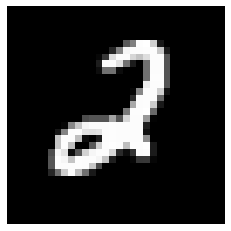

In [12]:
plt.imshow(x_train[233],cmap='gray')
plt.axis('off')
plt.show()

In [13]:
x_train.shape
x_train=np.expand_dims(x_train,3)
x_test=np.expand_dims(x_test,3)
x_train.shape

(60000, 32, 32, 1)

In [22]:
model=Sequential(name="LeNet-5")
model.add(Conv2D(6,(5,5),strides=(1,1), activation='tanh',input_shape=(32,32,1), name='C1'))
model.add(AveragePooling2D(name='S1'))
model.add(Conv2D(16,(5,5),strides=(1,1),activation='tanh',name='C3'))
model.add(AveragePooling2D(name='S4'))
model.add(Flatten())
model.add(Dense(120,activation='tanh',name='FC5'))
model.add(Dense(84,activation='tanh',name='FC6'))
model.add(Dense(10,activation='softmax',name='Output'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "LeNet-5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C1 (Conv2D)                  (None, 28, 28, 6)         156       
_________________________________________________________________
S1 (AveragePooling2D)        (None, 14, 14, 6)         0         
_________________________________________________________________
C3 (Conv2D)                  (None, 10, 10, 16)        2416      
_________________________________________________________________
S4 (AveragePooling2D)        (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
FC5 (Dense)                  (None, 120)               48120     
_________________________________________________________________
FC6 (Dense)                  (None, 84)                1016

In [23]:
hist=model.fit(x_train,y_train,epochs=10,batch_size=1000)

Epoch 1/10
60/60 [==============================] - 1s 17ms/step - loss: 0.7867 - accuracy: 0.7998
Epoch 2/10
60/60 [==============================] - 1s 17ms/step - loss: 0.2950 - accuracy: 0.9132
Epoch 3/10
60/60 [==============================] - 1s 17ms/step - loss: 0.2160 - accuracy: 0.9356
Epoch 4/10
60/60 [==============================] - 1s 17ms/step - loss: 0.1684 - accuracy: 0.9501
Epoch 5/10
60/60 [==============================] - 1s 17ms/step - loss: 0.1372 - accuracy: 0.9592
Epoch 6/10
60/60 [==============================] - 1s 17ms/step - loss: 0.1141 - accuracy: 0.9665
Epoch 7/10
60/60 [==============================] - 1s 17ms/step - loss: 0.0970 - accuracy: 0.9710
Epoch 8/10
60/60 [==============================] - 1s 18ms/step - loss: 0.0840 - accuracy: 0.9750
Epoch 9/10
60/60 [==============================] - 1s 17ms/step - loss: 0.0737 - accuracy: 0.9781
Epoch 10/10
60/60 [==============================] - 1s 17ms/step - loss: 0.0651 - accuracy: 0.9807


In [24]:
_,acc=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0693 - accuracy: 0.9789


In [25]:
acc

0.9789000153541565

In [26]:
import pandas as pd
data=pd.DataFrame(hist.history)

In [27]:
data['epoch']=hist.epoch

In [28]:
hist.history['accuracy']

[0.7998166680335999,
 0.9132000207901001,
 0.9355666637420654,
 0.9501333236694336,
 0.9591500163078308,
 0.9665499925613403,
 0.9710333347320557,
 0.9749833345413208,
 0.9781333208084106,
 0.9806666374206543]

In [30]:
plt.style.use('ggplot')

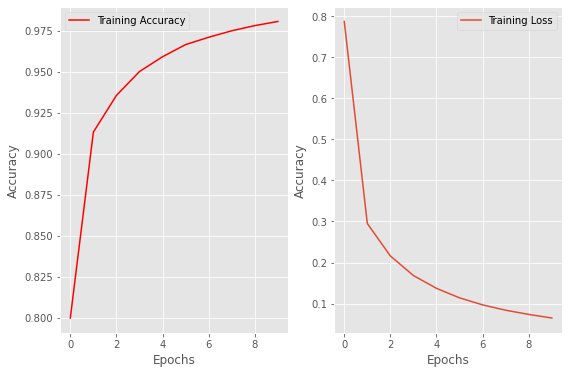

In [34]:
fig, (ax1, ax2)=plt.subplots(nrows=1,ncols=2,figsize=(9,6))  
fig.subplots_adjust(hspace=0.5)
ax1.plot(data['epoch'],data['accuracy'],color='red',label='Training Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax2.plot(data['epoch'],data['loss'],label='Training Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

In [ ]:
def initia